# Analyze the given Concrete dataset and apply Numpy, Pandas and Visualization function

## <span style='color:Blue'> Problem statement:  </span>
### <span style='color:Blue'> Effect of superplastic & Ash on the compressive strength of Concrete.
  </span>


In [ ]:
#BALA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('concrete.csv')
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.head(10)# Returns the first 10 rows

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
df.tail(10)# Returns the last 10 rows

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.88
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.54
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.46
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
df.shape # Returns a tuple which represent the dimension of the dataframe. here 1030 rows and 9 columns.

(1030, 9)

In [6]:
df.info()#print a concise summery of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


 ### <span style='color:Blue'> Data Cleaning  </span>

Since our problem is restricted to the influence of Superplastic and ash on the strength, we will drop other unwanted data

In [7]:
df1=df.drop(df.columns[[0,1,3,5,6,7]],axis=1) # drop the unwanted columns
df1.drop_duplicates(inplace=True) # remove the rows with duplicate values
df1

,ash,superplastic,strength
0,0.0,2.5,79.99
1,0.0,2.5,61.89
2,0.0,0.0,40.27
3,0.0,0.0,41.05
4,0.0,0.0,44.30
...,...,...,...
1025,90.3,8.9,44.28
1026,115.6,10.4,31.18
1027,108.6,6.1,23.70
1028,0.0,11.3,32.77


In [8]:
df1.columns # lists the columns available

Index(['ash', 'superplastic', 'strength'], dtype='object')

In [9]:
# Replacing the zero values with NaN
df1['ash'] = df1['ash'].replace({0:np.nan})
df1['superplastic'] = df1['superplastic'].replace({0:np.nan})
df1

,ash,superplastic,strength
0,NaN,2.5,79.99
1,NaN,2.5,61.89
2,NaN,NaN,40.27
3,NaN,NaN,41.05
4,NaN,NaN,44.30
...,...,...,...
1025,90.3,8.9,44.28
1026,115.6,10.4,31.18
1027,108.6,6.1,23.70
1028,NaN,11.3,32.77


In [10]:
df1.dropna(how='any',axis=0,inplace=True)# Remove the corresponding rows of Ash and Superplastic having NaN/no input.
df1

,ash,superplastic,strength
184,96.7,4.5,11.58
185,96.7,4.5,24.45
186,96.7,4.5,24.89
187,96.7,4.5,29.45
188,96.7,4.5,40.71
...,...,...,...
1022,86.5,5.9,41.54
1025,90.3,8.9,44.28
1026,115.6,10.4,31.18
1027,108.6,6.1,23.70


In [11]:
cmat = df1.corr()# Finding the correlation matrix of the cleaned data
cmat

,ash,superplastic,strength
ash,1.000000,0.054235,-0.223572
superplastic,0.054235,1.000000,0.154383
strength,-0.223572,0.154383,1.000000


 ### <span style='color:Blue'> Visualization  </span>

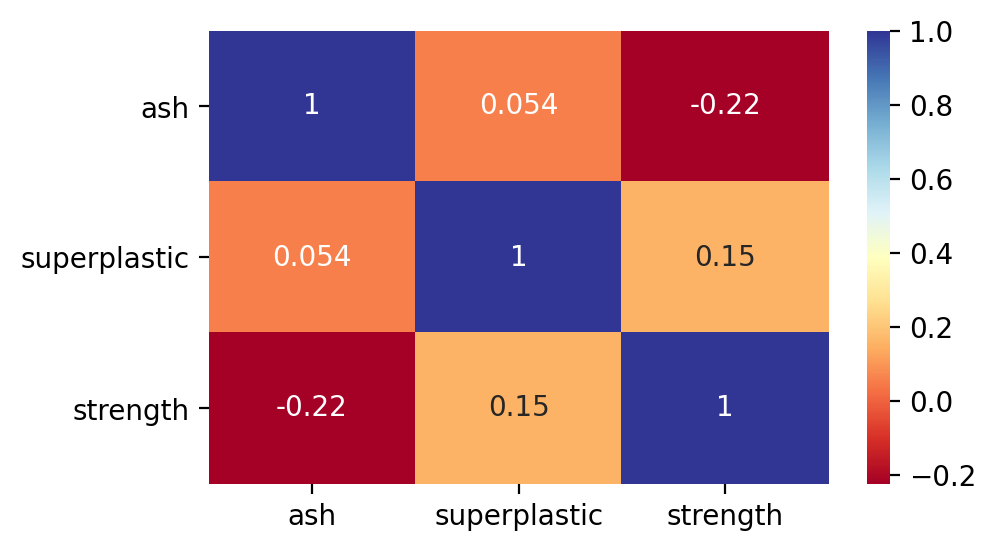

In [12]:
#Plotting the correlation ash,superplastic and strength using heatmap
plt.figure(figsize=(5,3),dpi=200)
sns.heatmap(cmat,annot=True,cmap='RdYlBu')

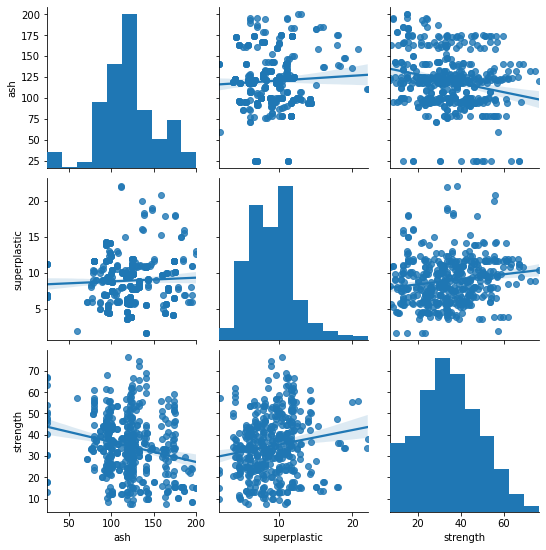

In [13]:
#Pair plot visualization of the above data
sns.pairplot(df1[['ash','superplastic','strength']],kind='reg')

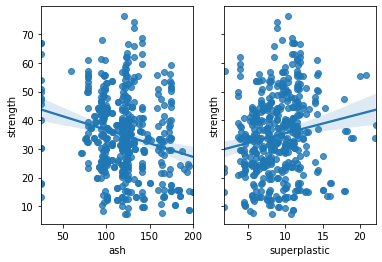

In [14]:
# Linear regression plot for Ash,Superplastic Vs Strength.
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(data=df1,x='ash',y='strength',ax=ax1)
sns.regplot(data=df1,x='superplastic',y='strength',ax=ax2)

 ### <span style='color:Blue'> Conclusion  </span>

As per the analysis, 
Superplastic exhibits a positive correlation with strength;and Ash shows a negative correlation with strength.
So, we can conclude that the increase in Superplastic has increased the compressive strength of concrete, whereas the increase in Ash has reduced the compressive strength of concrete.

In [ ]:
#Akshay

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import warnings
warnings.filterwarnings(action = 'ignore')

In [16]:
df = pd.read_csv("concrete.csv")
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [18]:
water = df.groupby("water")
#water.first(10)

In [143]:
np.unique(df[["water","strength"]].head(20),axis=0)

array([[162.  ,  61.89],
       [162.  ,  79.99],
       [192.  ,  28.02],
       [192.  ,  38.07],
       [192.  ,  39.36],
       [192.  ,  44.3 ],
       [228.  ,  36.45],
       [228.  ,  39.29],
       [228.  ,  40.27],
       [228.  ,  40.56],
       [228.  ,  41.05],
       [228.  ,  42.33],
       [228.  ,  42.62],
       [228.  ,  43.01],
       [228.  ,  43.7 ],
       [228.  ,  45.85],
       [228.  ,  47.03],
       [228.  ,  47.81],
       [228.  ,  52.91],
       [228.  ,  56.14]])

In [19]:
df[["water","strength"]].corr()

,water,strength
water,1.000000,-0.289633
strength,-0.289633,1.000000


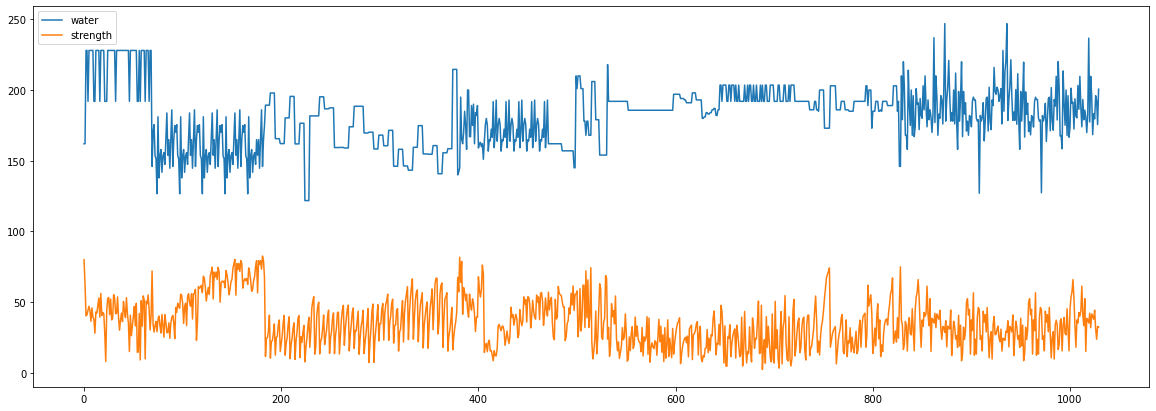

In [20]:
df[["water","strength"]].plot(figsize=(20,7))

Text(0.5, 1.0, 'correlation')

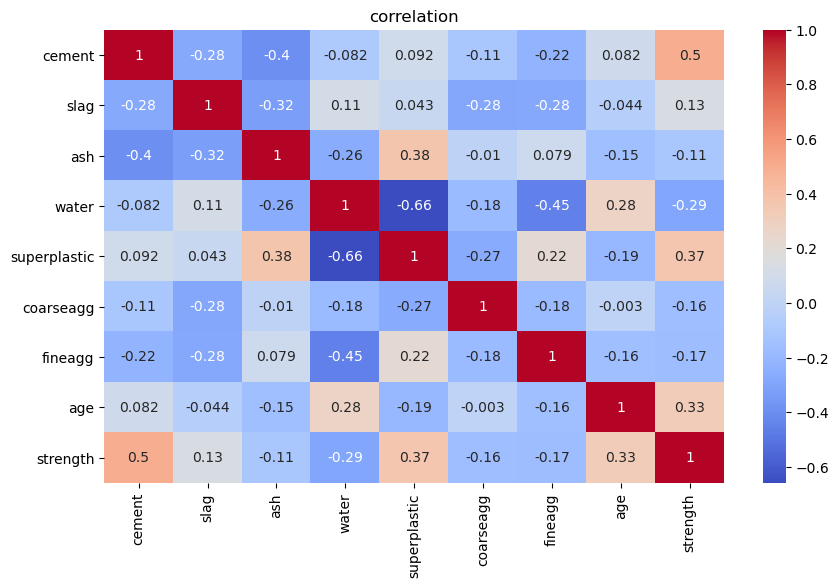

In [21]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title("correlation")


In [148]:
#uma 

In [149]:
#Anoop

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of Concrete Strength using Cement Mixture + Slag

In [24]:
df2=pd.read_csv('concrete.csv')
df2
df2.a = df2[(df2.iloc[:, 1:] != 0).slag]
df2.a.drop(['ash'], axis = 1, inplace = True)
df2.a

,cement,slag,water,superplastic,coarseagg,fineagg,age,strength
2,332.5,142.5,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,228.0,0.0,932.0,594.0,365,43.70
...,...,...,...,...,...,...,...,...
1024,166.0,259.7,183.2,12.7,858.8,826.8,28,37.92
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,44.28
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,32.77


max strength using Cement+Slag: 82.6
min strength using Cement+Slag: 2.33


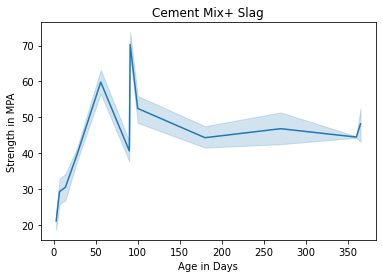

In [25]:

sns.lineplot(df2.a.age,df2.a.strength)
plt.title('Cement Mix+ Slag')
plt.xlabel('Age in Days')
plt.ylabel('Strength in MPA')
a=df2.a.strength.max()
b=df2.a.strength.min()
print ('max strength using Cement+Slag:',a )
print ('min strength using Cement+Slag:',b )


# Analysis of Concrete Strength using Cement Mixture + Ash

In [26]:
df3=pd.read_csv('concrete.csv')
df3
df3.a = df3[(df3.iloc[:, 1:] != 0).ash]
df3.a.drop(['slag'], axis = 1, inplace = True)
df3.a

,cement,ash,water,superplastic,coarseagg,fineagg,age,strength
184,222.4,96.7,189.3,4.5,967.1,870.3,3,11.58
185,222.4,96.7,189.3,4.5,967.1,870.3,14,24.45
186,222.4,96.7,189.3,4.5,967.1,870.3,28,24.89
187,222.4,96.7,189.3,4.5,967.1,870.3,56,29.45
188,222.4,96.7,189.3,4.5,967.1,870.3,100,40.71
...,...,...,...,...,...,...,...,...
1022,264.5,86.5,195.5,5.9,832.6,790.4,28,41.54
1025,276.4,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,108.6,192.7,6.1,892.4,780.0,28,23.70


max strength  using Cement+Ash: 76.24
min strength  using Cement+Ash: 7.32


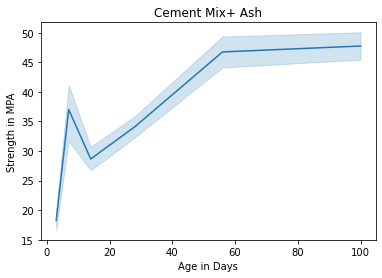

In [27]:
sns.lineplot(df3.a.age,df3.a.strength)
plt.title('Cement Mix+ Ash')
plt.xlabel('Age in Days')
plt.ylabel('Strength in MPA')
a=df3.a.strength.max()
b=df3.a.strength.min()
print ('max strength  using Cement+Ash:',a )
print ('min strength  using Cement+Ash:',b )

# Final Conclusion:

max strength using Cement+Slag: 82.6
min strength using Cement+Slag: 2.33


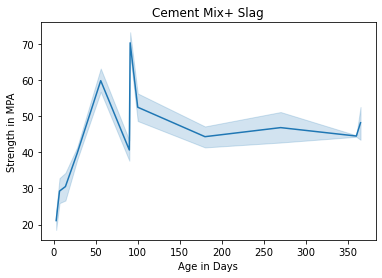

In [28]:
#1. Cement + Slag
sns.lineplot(df2.a.age,df2.a.strength)
plt.title('Cement Mix+ Slag')
plt.xlabel('Age in Days')
plt.ylabel('Strength in MPA')
a=df2.a.strength.max()
b=df2.a.strength.min()
print ('max strength using Cement+Slag:',a )
print ('min strength using Cement+Slag:',b )

max strength  using Cement+Ash: 76.24
min strength  using Cement+Ash: 7.32


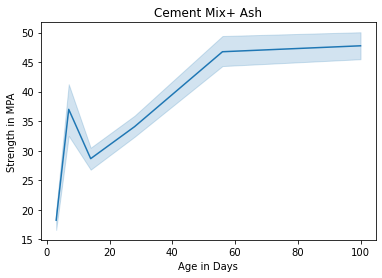

In [29]:
#2. Cement + Ash
sns.lineplot(df3.a.age,df3.a.strength)
plt.title('Cement Mix+ Ash')
plt.xlabel('Age in Days')
plt.ylabel('Strength in MPA')
a=df3.a.strength.max()
b=df3.a.strength.min()
print ('max strength  using Cement+Ash:',a )
print ('min strength  using Cement+Ash:',b )


In [ ]:
#Fly Ash : Waster from thermal Plants
#Slag: Waste from Iron and Steel Industry

# We did a analysis to find the strength of the concrete by :
#1.Cement + FlyAsh
#In the initial stage the min strenght of the concerete was getting stronger using this mixture but later the strenght was not inmproving 

#2. Cement+ Slag
# This combination takes a little more time compared to set as the min strenght is less as compared to ash, but increases with age .
#Analysis shows the cement+Slag has a better strength ration

# From the enviornment point of view it is very important to use fly ash and slag in the cement mixture 

In [ ]:
#Ananth

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_concrete = pd.read_csv('concrete.csv')

# Prilimary Data Analysis
Understanding the data, rows and columns and kind of information.

In [32]:
df_concrete.describe()
# conclusion drawn here is that the concrete can be prepared wihtout slag, ash or superplastic (since the min =0)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [33]:
df_concrete['cement'].describe()

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

In [34]:
df_concrete.info()
# helps understand that there are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [35]:
df_concrete_corr = df_concrete.corr()
df_concrete_corr
# Cement to Strength there is a strong co relation 0.49.
#Cement to Water there is a negative co relation i.e to say that they move in opposite direction (more water less cement??)
# but this is a weak co relation -0.08 same is the case with slag ash and water.
#cement to age is not a very strong co relation.  means the age for curing is also influenced by the other parameters.  example 
# water 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


# Conclusion of prelimary analysis
Fine aggegate and Strength are negatively co related 
Coarse Aggregate and Stretht are also negatively corelated
Fine aggregate is more negatively co related to the age than the coarse aggregate to age

# Deeper analysis of the specific parameter of interest
Analyse the data rows for Coarse Agg and Fine Aggregates

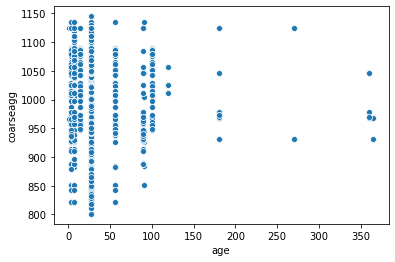

In [36]:
sns.scatterplot(x='age',y='coarseagg', data=df_concrete)

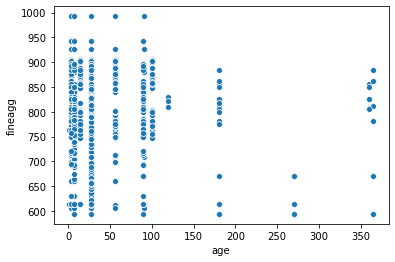

In [37]:
sns.scatterplot(x='age',y='fineagg', data=df_concrete)

# Conclusion - Data Analyis
Above plot on the coarse aggregate to age indicates that beyond 100 days of age, we have very few records
Above plot on the fine aggregate to age indicates that beyond 100 days of age, we have very few records but much more than the coarse aggregate. hence the age should be around 200 days to let go of some data if we decide to filter data and elimnate by the age.


# Data anlysis of the coarse agg to sterength with the scatter plot to find the spread

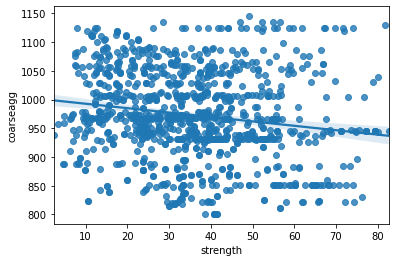

In [38]:
sns.regplot(data=df_concrete, x='strength', y='coarseagg') # best fit on the scatter plot

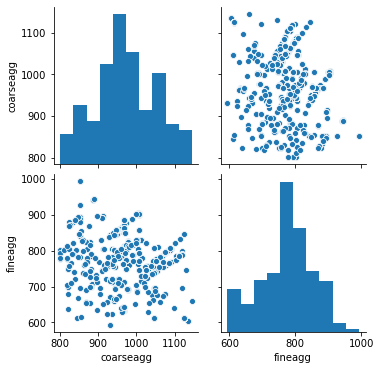

In [39]:
sns.pairplot(df_concrete[['coarseagg','fineagg']], kind='scatter')

# Above plot says that there is no data for coarse aggregate which is best fit relation between coarseagg and strength
# which primarily means there are other influencers may be to the strength or the data is bad


# Slice the data so that we use the data records of only Cement, Coarse and Fine aggregate mix without Ash, slag and superplastic additive/replacers

In [40]:
# get the concrete mix which is without ash, slag and superplastic i.e it only has cement, coarse aggregate and fine aggregate

df_concrete_wo_ash_slag= df_concrete[(df_concrete['ash'] == 0) & (df_concrete['slag']==0) &
                                     (df_concrete['superplastic'] ==0) & (df_concrete['age']>10)
                                     & (df_concrete['cement'] > 0) ]  

In [41]:
df_concrete_wo_ash_slag

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
15,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90,52.91
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30
...,...,...,...,...,...,...,...,...,...
822,322.0,0.0,0.0,203.0,0.0,974.0,800.0,28,25.18
823,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
824,302.0,0.0,0.0,203.0,0.0,974.0,817.0,28,21.75
825,397.0,0.0,0.0,185.0,0.0,1040.0,734.0,28,39.09


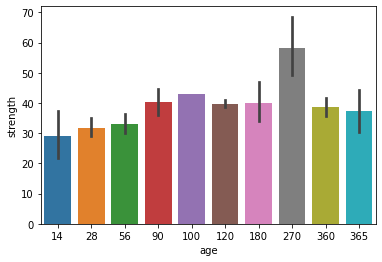

In [42]:
#sns.boxplot(x=df_concrete_wo_ash_slag.age, y=df_concrete_wo_ash_slag.strength)
sns.barplot(x=df_concrete_wo_ash_slag.age, y=df_concrete_wo_ash_slag.strength)
# Bar plot to show the age and strength of such a concrete.
#conclusion there are other parameters which may be influencing the strenght
#in the mix as the plot is not linear as indicated below.

# Conclusion - Data Analyis
Concrete mix with Cement, Coarse and Fine Aggregates have maybe water and the composition (ratio of the cement to coarse and fine agg) which influences the strength with age.

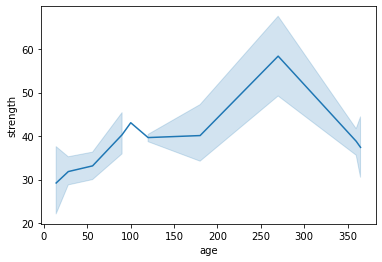

In [43]:
#line plot to indicate that the strength is not linear to the age
sns.lineplot(x=df_concrete_wo_ash_slag.age, y=df_concrete_wo_ash_slag.strength)

# We cannot conclude that the Stength and Age and its relationship to the each other as there are may be other factors leading to the variation of streght with age example composition

In [44]:
df_concrete_wo_ash_slag.describe(percentiles=[.20,.40,.50,.60,.80])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,134.000000,134.0,134.0,134.000000,134.0,134.000000,134.000000,134.000000,134.000000
mean,356.996269,0.0,0.0,193.554478,0.0,1014.823881,769.073134,93.611940,35.907687
std,86.608850,0.0,0.0,13.427352,0.0,71.642146,84.158620,100.312812,13.367125
min,200.000000,0.0,0.0,146.000000,0.0,838.400000,594.000000,14.000000,12.250000
20%,285.800000,0.0,0.0,185.700000,0.0,967.200000,716.700000,28.000000,25.140000
40%,331.000000,0.0,0.0,192.000000,0.0,974.000000,769.440000,28.000000,31.668000
50%,339.000000,0.0,0.0,192.000000,0.0,978.000000,782.000000,28.000000,33.655000
60%,350.000000,0.0,0.0,192.000000,0.0,1039.600000,800.000000,90.000000,37.402000
80%,417.400000,0.0,0.0,200.000000,0.0,1104.000000,830.000000,180.000000,43.776000
max,540.000000,0.0,0.0,228.000000,0.0,1125.000000,945.000000,365.000000,74.990000


above decription is to understand the various spread of the data in the percentiles 

Now Plot the age v/s the coarse and fine aggregate to have the plot represent the relation ship of the Mix to the age.

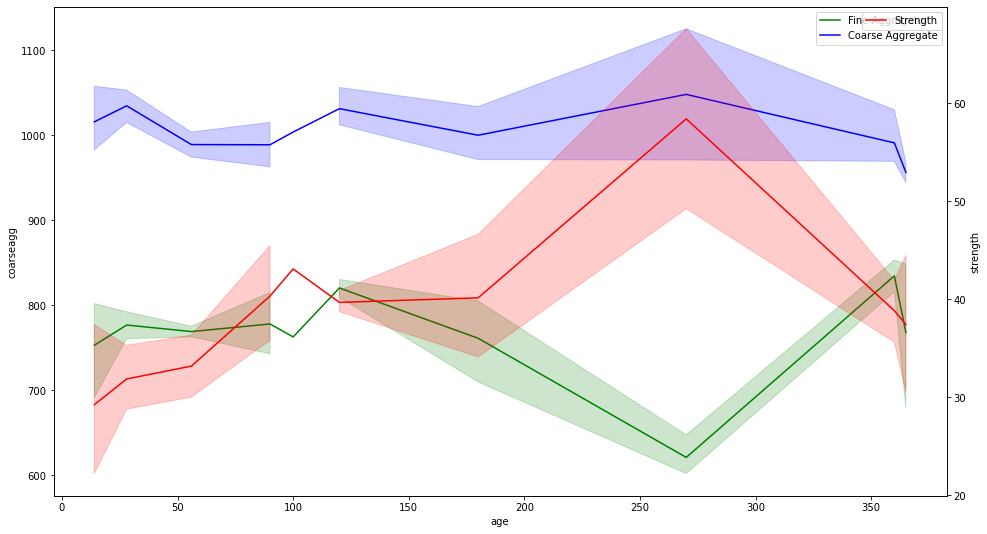

In [45]:
plt.figure(figsize=(16,9))
sns.lineplot(x='age', y='fineagg', data=df_concrete_wo_ash_slag,color='green',label='Fine Aggregate',legend = 'full')

sns.lineplot(x='age', y='coarseagg', data=df_concrete_wo_ash_slag,color='blue',label='Coarse Aggregate',legend = 'full')
plt.twinx()
sns.lineplot(x='age', y='strength', data=df_concrete_wo_ash_slag,color='red',label='Strength')

# Final Conclusion from the above Picture
The mix of Fine and Coarse aggregate needs to be of certain proportion to have a final strenght which may be influenced by their ratio however the above plot is inconclusive as the other parameters are missing in the above pictorial representation
However seems that the higher proportion of the coarse mix mostly influences in having a concreate of higher strength and the lower propotion of the fine aggregate may also support the higher strength int he concrete.  Hower this may increae the days required for aging

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE059FC430>]],
      dtype=object)

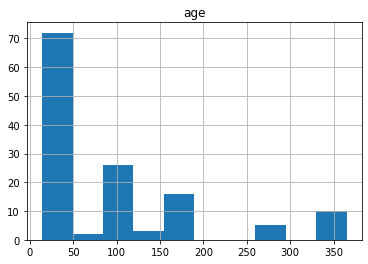

In [46]:
df_concrete_wo_ash_slag.hist(column='age') # shows the distribution of age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE0778F5E0>]],
      dtype=object)

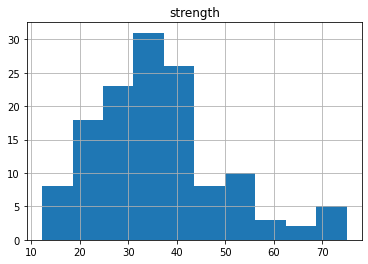

In [47]:
df_concrete_wo_ash_slag.hist(column='strength') # shows the distribution of age

In [48]:
df_concrete_wo_ash_slag[df_concrete_wo_ash_slag.strength <50]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
33,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270,42.13
38,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.23
56,475.0,0.0,0.0,228.0,0.0,932.0,594.0,365,41.93
...,...,...,...,...,...,...,...,...,...
821,322.0,0.0,0.0,203.0,0.0,974.0,800.0,14,20.77
822,322.0,0.0,0.0,203.0,0.0,974.0,800.0,28,25.18
823,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
824,302.0,0.0,0.0,203.0,0.0,974.0,817.0,28,21.75
